## MagLev losses: calculations

### Test implementation, for 1 of the experiments.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Set the style
plt.style.use('https://github.com/kaiuki2000/PitayaRemix/raw/main/PitayaRemix.mplstyle')

df_FC_Long_1 = pd.read_csv('../Data/FC/FC_Long_1.csv', skiprows = 1, delimiter = ';')
print(f'Read {len(df_FC_Long_1)} rows.')

Read 1870 rows.


Plotting $x$'s results. These are corrected, so that they average $0$.

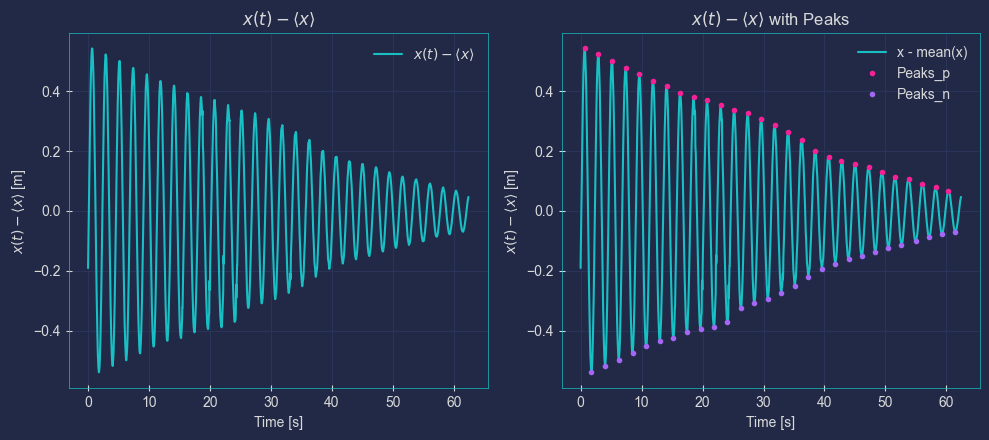

In [5]:
# Read the data
t = df_FC_Long_1['t']
x = df_FC_Long_1['x']
y = df_FC_Long_1['y']

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4.5))

# Plot the first subplot
axs[0].plot(t, x - np.mean(x), label=r'$x(t) - \left<x\right>$')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel(r'$x(t) - \left<x\right>$ [m]')
axs[0].set_ylim(-max(x - np.mean(x)) - 0.05, max(x - np.mean(x)) + 0.05)
axs[0].set_title(r'$x(t) - \left<x\right>$')
axs[0].legend()

# Find the peaks
new_x = x - np.mean(x)
peaks_p, _ = find_peaks(new_x, distance=35, prominence=0.1)  # t[35] = 1.166 s. This is the minimum time between peaks.
peaks_n, _ = find_peaks(-new_x, distance=35, prominence=0.1)

# Plot the second subplot
axs[1].plot(t, new_x, label='x - mean(x)')
axs[1].plot(t[peaks_p], new_x[peaks_p], '.C1', label='Peaks_p')
axs[1].plot(t[peaks_n], new_x[peaks_n], '.C2', label='Peaks_n')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel(r'$x(t) - \left<x\right>$ [m]')
axs[1].set_ylim(-max(new_x) - 0.05, max(new_x) + 0.05)
axs[1].set_title(r'$x(t) - \left<x\right>$ with Peaks')
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


Here, I transform the $x$ values back to $y$ values, and plot them. I do this because the $x$ values appear to be more stable. (The $y$ values showed some oscillations, probably due to the camera being tilted, relative to this axis - See sketch below.)

<img src="./Assets/y_problem_rotated.jpg" alt="Image Description" width="700px">


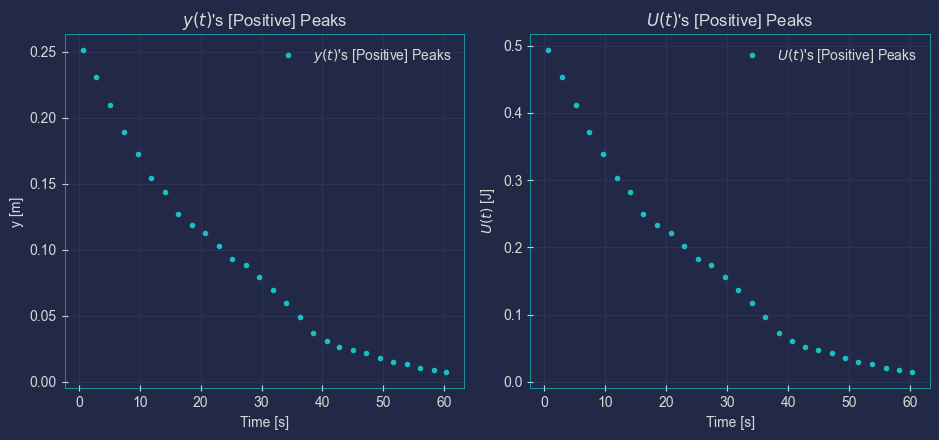

In [6]:
R = 0.80 # m # Change this value to the radius of the track
y_t =  [R - np.sqrt(R**2 - x**2) for x in x[peaks_p]]
t_t = t[peaks_p]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(9.5, 4.5))

# Plot the data with peaks on the first subplot
axs[0].plot(t_t, y_t, '.', label=r"$y(t)$'s [Positive] Peaks")
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('y [m]')
axs[0].set_title(r"$y(t)$'s [Positive] Peaks")
axs[0].legend()

# Pot. energy:
m = 0.2 # kg # Change this value to the mass of the object
g = 9.81 # m/s^2
U = [m * g * y for y in y_t]

# Plot the data with peaks on the second subplot
axs[1].plot(t_t, U, '.', label=r"$U(t)$'s [Positive] Peaks")
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel(r'$U(t)$ [J]')
axs[1].set_title(r"$U(t)$'s [Positive] Peaks")
axs[1].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

Automating things, for later:
- Putting everything into a class, for easier massification;
- Testing the class with the provided example.

In [7]:
class CsvAnalyzer:
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path, skiprows=1, delimiter=';')
        self.name = file_path.split('/')[-1]
        self.t = self.df['t']
        self.x = self.df['x']
        self.y = self.df['y']
        self.peaks_p = None
        self.U = None
        print(f'Read {len(self.df)} rows (from {file_path}).')

    def correct_x(self):
        self.x = self.df['x'] - np.mean(self.df['x'])

    def find_peaks(self, d = 35, p = 0.1):
        self.peaks_p, _ = find_peaks(self.x, distance = d, prominence = p)
        print(f'Found {len(self.peaks_p)} [positive] peaks.')
        
    def transform_to_y(self, R):
        self.y = [R - np.sqrt(R**2 - x**2) for x in self.x]

    def calculate_potential_energy(self, m, g):
        self.U = [m * g * y for y in np.array(self.y)[self.peaks_p]]

    def plot_potential_energy(self):
        plt.plot(self.t[self.peaks_p], self.U, '.', label=r"$U(t)$'s [Positive] Peaks")
        plt.xlabel('Time [s]')
        plt.ylabel(r'$U(t)$ [J]')
        plt.title(r"$U(t)$'s [Positive] Peaks for " + self.name)
        plt.legend()
        plt.show()

    def resolve(self, R, m, g, d, p):
        """
        Resolve the data and plot the potential energy.

        --- Parameters ---
        R: radius of the track [m]
        m: mass of the object [kg]
        g: gravity [m/s^2]
        d: minimum distance between peaks [s]
        p: minimum prominence of peaks [m]

        --- Returns ---
        None
        """
        self.correct_x()
        self.find_peaks(d, p)
        self.transform_to_y(R)
        self.calculate_potential_energy(m, g)
        self.plot_potential_energy()

        return self.t[self.peaks_p], self.U

Yeah, now I just need to run all the other experiments through Tracker, to obtain the $x, y, t$ data, so I can then use the class to calculate the losses. (And compare the results...)

Read 1870 rows (from ../Data/FC/FC_Long_1.csv).
Read 1661 rows (from ../Data/FC/FC_Long_2.csv).
Read 471 rows (from ../Data/FC/FC_Long_3.csv).
Found 28 [positive] peaks.


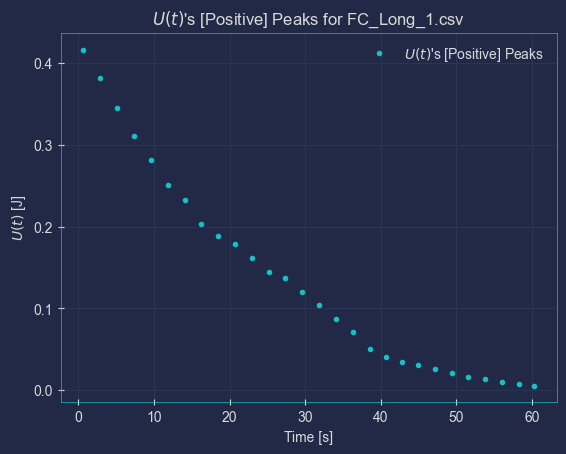

Found 22 [positive] peaks.


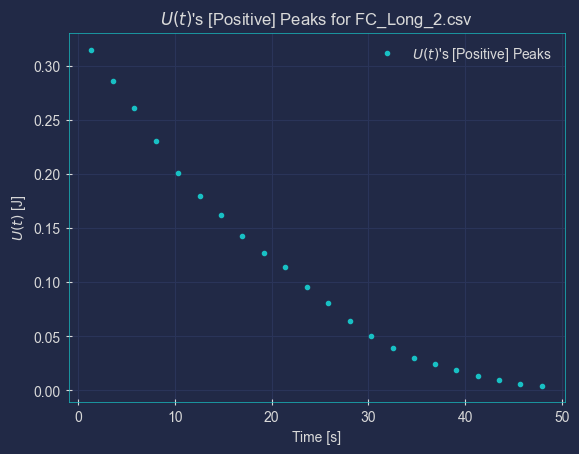

Found 7 [positive] peaks.


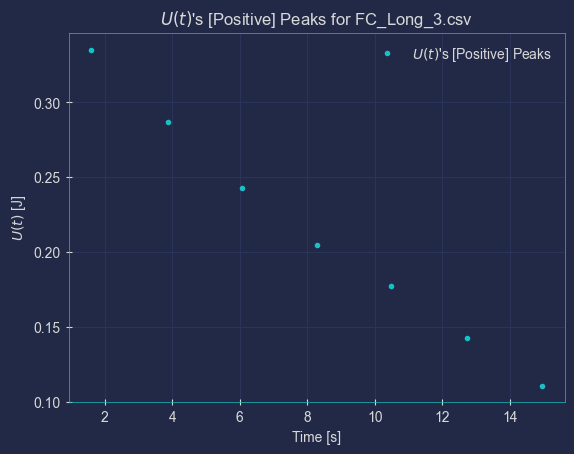

In [13]:
# Required definitions/parameters:
R, m, g, d, p = 0.80, 0.2, 9.81, 35, 0.1

# Test the class
# Running on the other FC_Long files:
csv_analyzer_FC_Long_1 = CsvAnalyzer('../Data/FC/FC_Long_1.csv')
csv_analyzer_FC_Long_2 = CsvAnalyzer('../Data/FC/FC_Long_2.csv')
csv_analyzer_FC_Long_3 = CsvAnalyzer('../Data/FC/FC_Long_3.csv')

FC_Long_1_t, FC_Long_1_U = csv_analyzer_FC_Long_1.resolve(R, m, g, d, p)
FC_Long_2_t, FC_Long_2_U = csv_analyzer_FC_Long_2.resolve(R, m, g, d, p)
FC_Long_3_t, FC_Long_3_U = csv_analyzer_FC_Long_3.resolve(R, m, g, d, p)

**I should also use the negative peaks!** (I'm only using the positive peaks, so far.)

Now, I do the same for ZFC, for the same initial height, $h^-$.

Read 3098 rows (from ../Data/ZFC/ZFC_h-_1.csv).
Read 3090 rows (from ../Data/ZFC/ZFC_h-_2.csv).
Read 2360 rows (from ../Data/ZFC/ZFC_h-_3.csv).
Found 46 [positive] peaks.


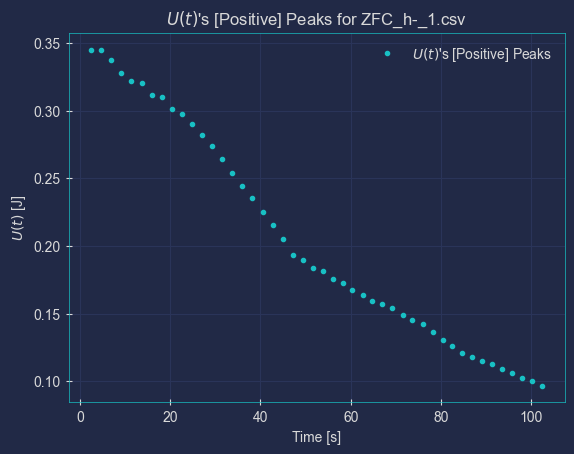

Found 46 [positive] peaks.


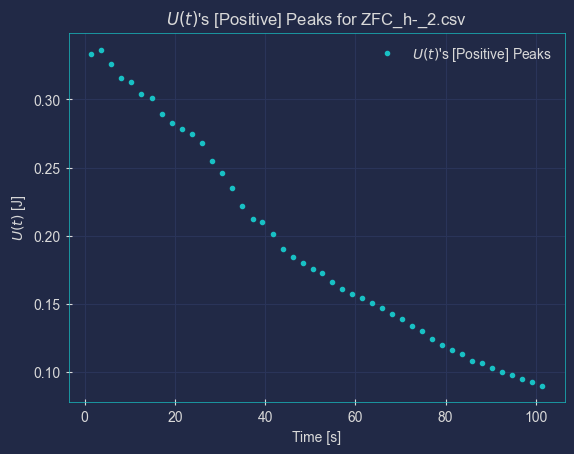

Found 35 [positive] peaks.


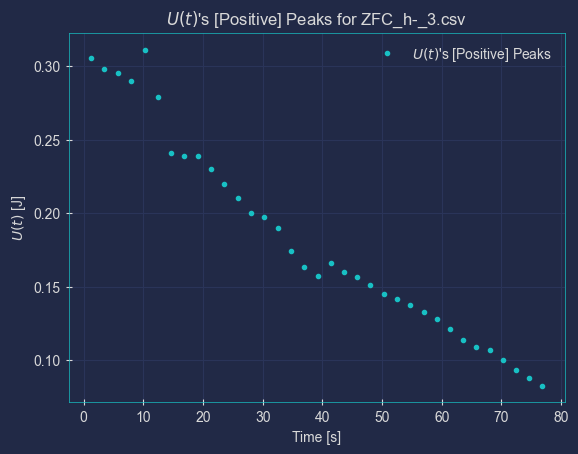

In [14]:
# Reading the data into the class
csv_analyzer_ZFC_h_m_1 = CsvAnalyzer('../Data/ZFC/ZFC_h-_1.csv')
csv_analyzer_ZFC_h_m_2 = CsvAnalyzer('../Data/ZFC/ZFC_h-_2.csv')
csv_analyzer_ZFC_h_m_3 = CsvAnalyzer('../Data/ZFC/ZFC_h-_3.csv')

# Resolving the data
ZFC_h_m_1_t, ZFC_h_m_1_U = csv_analyzer_ZFC_h_m_1.resolve(R, m, g, d, p)
ZFC_h_m_2_t, ZFC_h_m_2_U = csv_analyzer_ZFC_h_m_2.resolve(R, m, g, d, p)
ZFC_h_m_3_t, ZFC_h_m_3_U = csv_analyzer_ZFC_h_m_3.resolve(R, m, g, d, p)

Now, same for a greater initial height, $h^+$: (I'm still missing these!)

In [ ]:
# Reading the data into the class
csv_analyzer_ZFC_h_p_1 = CsvAnalyzer('./Data/ZFC/ZFC_h+_1.csv')
csv_analyzer_ZFC_h_p_2 = CsvAnalyzer('./Data/ZFC/ZFC_h+_2.csv')
csv_analyzer_ZFC_h_p_3 = CsvAnalyzer('./Data/ZFC/ZFC_h+_3.csv')

# Resolving the data
ZFC_h_p_1_t, ZFC_h_p_1_U = csv_analyzer_ZFC_h_p_1.resolve(R, m, g, d, p)
ZFC_h_p_2_t, ZFC_h_p_2_U = csv_analyzer_ZFC_h_p_2.resolve(R, m, g, d, p)
ZFC_h_p_3_t, ZFC_h_p_3_U = csv_analyzer_ZFC_h_p_3.resolve(R, m, g, d, p)

I can now compare all the results...

Other things to do:
- Tracker;
- Average the plots, for each height value (This will require that I go from time on the $x$ axis to $\#$ Cycles, and then average the values for each $\#$ Cycles value.);
- Also, put the FC and ZFC results together, for each height value, and compare them.

### Comparison section:

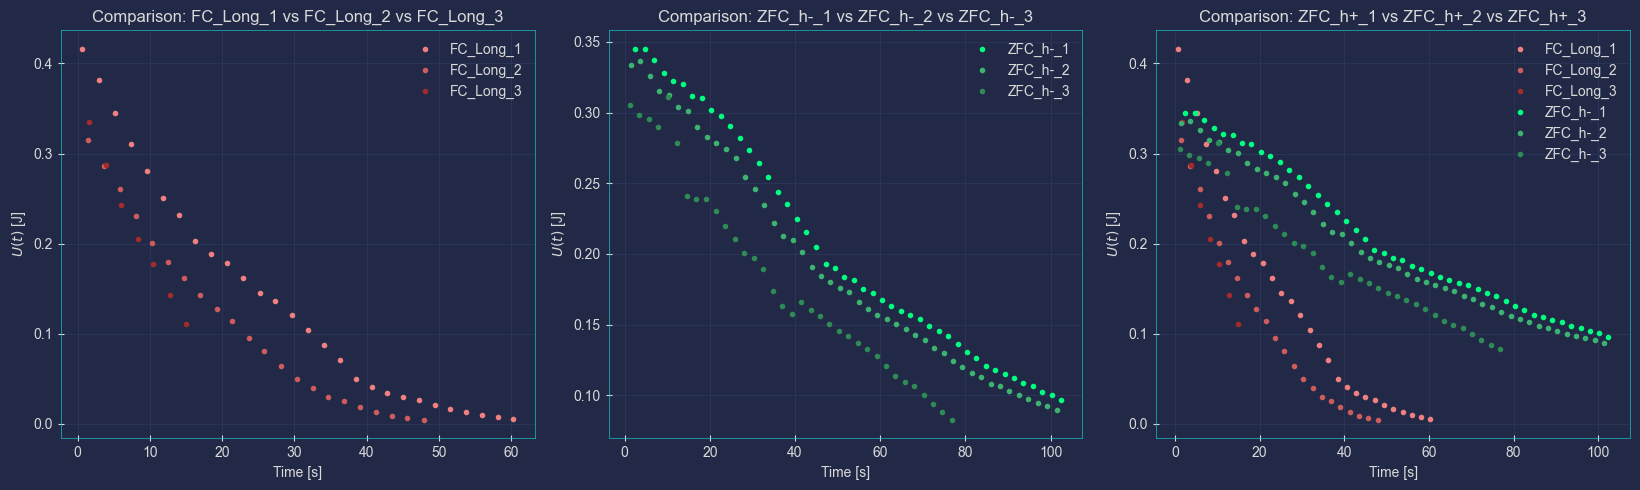

In [28]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(16.5, 5))

# Plot the data for FC_Long_1 and ZFC_h-_1 on the first subplot
axs[0].plot(FC_Long_1_t, FC_Long_1_U, '.',  color = 'lightcoral', label='FC_Long_1')
axs[0].plot(FC_Long_2_t, FC_Long_2_U, '.',  color = 'indianred',  label='FC_Long_2')
axs[0].plot(FC_Long_3_t, FC_Long_3_U, '.',  color = 'brown',      label='FC_Long_3')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel(r'$U(t)$ [J]')
axs[0].set_title('Comparison: FC_Long_1 vs FC_Long_2 vs FC_Long_3')
axs[0].legend()

# Plot the data for ZFC_h-_1 and ZFC_h-_2 on the second subplot
axs[1].plot(ZFC_h_m_1_t, ZFC_h_m_1_U, '.',  color = 'springgreen',       label='ZFC_h-_1')
axs[1].plot(ZFC_h_m_2_t, ZFC_h_m_2_U, '.',  color = 'mediumseagreen', label='ZFC_h-_2')
axs[1].plot(ZFC_h_m_3_t, ZFC_h_m_3_U, '.',  color = 'seagreen',    label='ZFC_h-_3')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel(r'$U(t)$ [J]')
axs[1].set_title('Comparison: ZFC_h-_1 vs ZFC_h-_2 vs ZFC_h-_3')
axs[1].legend()

# Plot the data for ZFC_h+_1, ZFC_h+_2, and ZFC_h+_3 on the third subplot
axs[2].plot(FC_Long_1_t, FC_Long_1_U, '.', color = 'lightcoral',     label='FC_Long_1')
axs[2].plot(FC_Long_2_t, FC_Long_2_U, '.', color = 'indianred',      label='FC_Long_2')
axs[2].plot(FC_Long_3_t, FC_Long_3_U, '.', color = 'brown',          label='FC_Long_3')
axs[2].plot(ZFC_h_m_1_t, ZFC_h_m_1_U, '.', color = 'springgreen',       label='ZFC_h-_1')
axs[2].plot(ZFC_h_m_2_t, ZFC_h_m_2_U, '.', color = 'mediumseagreen', label='ZFC_h-_2')
axs[2].plot(ZFC_h_m_3_t, ZFC_h_m_3_U, '.', color = 'seagreen',    label='ZFC_h-_3')
axs[2].set_xlabel('Time [s]')
axs[2].set_ylabel(r'$U(t)$ [J]')
axs[2].set_title('Comparison: ZFC_h+_1 vs ZFC_h+_2 vs ZFC_h+_3')
axs[2].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()


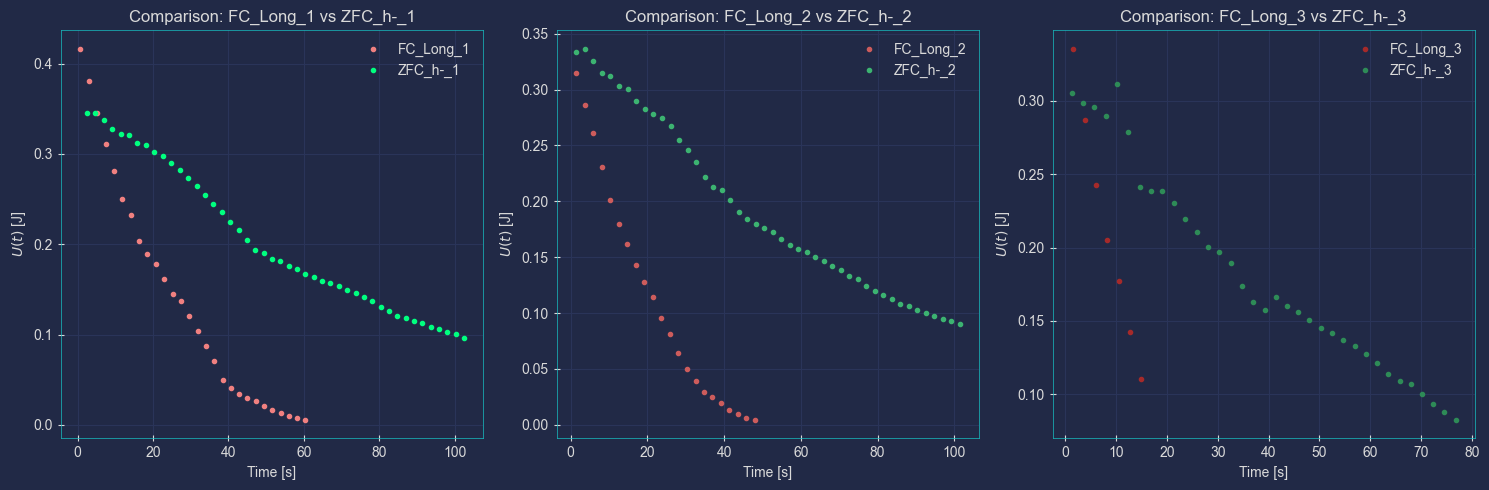

In [30]:
# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the data for FC_Long_1 and ZFC_h-_1 on the first subplot
axs[0].plot(FC_Long_1_t, FC_Long_1_U, '.', color = 'lightcoral', label='FC_Long_1')
axs[0].plot(ZFC_h_m_1_t, ZFC_h_m_1_U, '.', color = 'springgreen', label='ZFC_h-_1')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel(r'$U(t)$ [J]')
axs[0].set_title('Comparison: FC_Long_1 vs ZFC_h-_1')
axs[0].legend()

# Plot the data for FC_Long_2 and ZFC_h-_2 on the second subplot
axs[1].plot(FC_Long_2_t, FC_Long_2_U, '.', color = 'indianred', label='FC_Long_2')
axs[1].plot(ZFC_h_m_2_t, ZFC_h_m_2_U, '.', color = 'mediumseagreen', label='ZFC_h-_2')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel(r'$U(t)$ [J]')
axs[1].set_title('Comparison: FC_Long_2 vs ZFC_h-_2')
axs[1].legend()

# Plot the data for FC_Long_3 and ZFC_h-_3 on the third subplot
axs[2].plot(FC_Long_3_t, FC_Long_3_U, '.', color = 'brown', label='FC_Long_3')
axs[2].plot(ZFC_h_m_3_t, ZFC_h_m_3_U, '.', color = 'seagreen', label='ZFC_h-_3')
axs[2].set_xlabel('Time [s]')
axs[2].set_ylabel(r'$U(t)$ [J]')
axs[2].set_title('Comparison: FC_Long_3 vs ZFC_h-_3')
axs[2].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()
